In [1]:
import pandas as pd

##### Read Data
data=pd.read_csv("/content/dataset.csv")

##### Visualize your Data
print (data["question"])
print ("Length of training set",len(data["question"]))
print ("Unique answers are",set(data["answer"])," and number of unique answers are ", len(set(data["answer"])))

0                                                 Hello
1                                                    Hi
2                                            Greetings!
3                                                 Hello
4                             how are you doing today ?
                             ...                       
293        Who is in charge of the MIST Governing Body?
294          The MIST Governing Body's chairman is who?
295             Name the MIST Governing Body's chairman
296       Identify the head of the MIST Governing Body.
297    Who will be the head of the MIST Governing Body?
Name: question, Length: 298, dtype: object
Length of training set 298
Unique answers are {'MEseatavail', 'BUnitCost', 'Medical', 'PMEseatavail', 'Units', 'ARCHseatavail', 'CSEseatavail', 'ALevel', 'applicantsBsc', 'ChairmanCouncil', 'goodbye', 'CyberRangeLoc', 'NAMEseatavail', 'CSE', 'HSC', 'seatsavailBsc', 'EWCEseatavail', 'AUnitCost', 'OLevel', 'BachDegreeYear', 'HeadCSE', 'CEsea

In [2]:
##### Now let's pre process/ clean our data

In [3]:
### Remove Punctuations and change words to lower case
import re
def remove_punctuations(text):    
    words=[word.lower() for word in text.split()] 
    words=[w for word in words for w in re.sub(r'[^\w\s]','',word).split()]    
    return words

data["question_punctuation_removed"]=data["question"].apply(remove_punctuations)
#print (data["question_punctuation_removed"])
print(data)

                                             question             answer  \
0                                               Hello           greeting   
1                                                  Hi           greeting   
2                                          Greetings!           greeting   
3                                               Hello           greeting   
4                           how are you doing today ?           greeting   
..                                                ...                ...   
293      Who is in charge of the MIST Governing Body?  ChairmanGoverning   
294        The MIST Governing Body's chairman is who?  ChairmanGoverning   
295           Name the MIST Governing Body's chairman  ChairmanGoverning   
296     Identify the head of the MIST Governing Body.  ChairmanGoverning   
297  Who will be the head of the MIST Governing Body?  ChairmanGoverning   

                          question_punctuation_removed  
0                             

In [4]:
### Remove StopWords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
print (stop)
def remove_stopwords(text):
	modified_word_list=[word for word in text if word not in stop]
	return modified_word_list

data["question_stopword_removed"]=data["question_punctuation_removed"].apply(remove_stopwords)
print (data["question_stopword_removed"])

{'be', 'have', "didn't", 'didn', 'same', "wasn't", 'what', 'few', "don't", "shan't", "mightn't", 'himself', 'very', 'so', 'themselves', 'further', 'doesn', "hasn't", "it's", 'ours', 'from', 'such', 'needn', 'we', 'and', 't', 'under', 'does', 'who', 'isn', 'ma', 'against', "hadn't", 'you', 'an', 'until', 'all', 'don', 'nor', 'shouldn', 'am', 'by', 'y', 'ourselves', "that'll", 'wasn', 'when', 'below', 'he', 'off', 'myself', 'too', 'only', "isn't", 'out', 'mightn', 'because', 'to', 'these', 'hers', 'a', 'o', 'again', 'has', 'but', 'her', 'are', 'before', "couldn't", 'aren', 'should', 'each', "needn't", 'theirs', "should've", 'couldn', 'mustn', 'through', 'while', 'can', "she's", 'into', 'hasn', "you're", 'during', "wouldn't", 'this', 'of', 'then', 'herself', 'once', 'down', 'having', 'there', 'it', 'no', 'at', 'other', 've', 'd', 're', 'yourself', 'my', 'did', 's', 'some', 'than', 'his', 'haven', "haven't", 'between', 'our', "doesn't", 'm', 'was', 'just', 'its', 'had', 'not', 'do', 'on', 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
def negation_handling(words):
    counter=False    
    wlist=[]    
    negations=["no","not","cant","cannot","never","less","without","barely","hardly","rarely","no","not","noway","didnt"]
    #for words in wordlist:       
    for i,j in enumerate(words):                           
            if j in negations and i<len(words)-1:             
                wlist.append(str(words[i]+'-'+words[i+1]))
                counter=True
            else:
                if counter is False:                
                    wlist.append(words[i])
                else:
                    counter=False
    return wlist

data["question_negated"]=data["question_punctuation_removed"].apply(negation_handling)
print (data["question_negated"])

0                                                [hello]
1                                                   [hi]
2                                            [greetings]
3                                                [hello]
4                          [how, are, you, doing, today]
                             ...                        
293    [who, is, in, charge, of, the, mist, governing...
294     [the, mist, governing, bodys, chairman, is, who]
295        [name, the, mist, governing, bodys, chairman]
296    [identify, the, head, of, the, mist, governing...
297    [who, will, be, the, head, of, the, mist, gove...
Name: question_negated, Length: 298, dtype: object


In [6]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
def descriptive_words(words):
    meaningful_words=[]    
    tags=['VB','VBP','VBD','VBG','VBN','JJ','JJR','JJS','RB','RBR','RBS','UH',"NN",'NNP']    
    tagged_word=pos_tag(words)
    for word in tagged_word:            
        if word[1] in tags:
            meaningful_words.append(word[0])
    return meaningful_words 
data["question_descriptive"]=data["question_negated"].apply(descriptive_words)
print (data["question_descriptive"])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


0                                       [hello]
1                                          [hi]
2                                            []
3                                       [hello]
4                           [are, doing, today]
                         ...                   
293             [charge, mist, governing, body]
294          [mist, governing, bodys, chairman]
295    [name, mist, governing, bodys, chairman]
296     [identify, head, mist, governing, body]
297           [be, head, mist, governing, body]
Name: question_descriptive, Length: 298, dtype: object


In [7]:
### Stemming of Words
from nltk.stem.porter import PorterStemmer
st=PorterStemmer()
def Stemming(text):
	stemmed_words=[st.stem(word) for word in text] 
	return stemmed_words

data["question_stemmed"]=data["question_descriptive"].apply(Stemming)
print (data["question_stemmed"])

0                                   [hello]
1                                      [hi]
2                                        []
3                                   [hello]
4                          [are, do, today]
                       ...                 
293             [charg, mist, govern, bodi]
294          [mist, govern, bodi, chairman]
295    [name, mist, govern, bodi, chairman]
296    [identifi, head, mist, govern, bodi]
297          [be, head, mist, govern, bodi]
Name: question_stemmed, Length: 298, dtype: object


In [8]:
### Recreating the sentence
def Recreate(text):
	word=" ".join(text)
	return word

data["modified_sentence"]=data["question_stemmed"].apply(Recreate)
print (data["modified_sentence"])	

0                               hello
1                                  hi
2                                    
3                               hello
4                        are do today
                    ...              
293            charg mist govern bodi
294         mist govern bodi chairman
295    name mist govern bodi chairman
296    identifi head mist govern bodi
297          be head mist govern bodi
Name: modified_sentence, Length: 298, dtype: object


In [9]:
def Cleaning(text):
    text_punctuation_removed=remove_punctuations(text)
    text_stopword_removed=remove_stopwords(text_punctuation_removed)
    text_unnegated=negation_handling(text_punctuation_removed)
    text_descriptive=descriptive_words(text_unnegated)
    text_stemmed=Stemming(text_descriptive)
    final_text=Recreate(text_stemmed)
    return final_text
data["modified_sentence"]=data["question"].apply(Cleaning)
print (data["modified_sentence"])

0                               hello
1                                  hi
2                                    
3                               hello
4                        are do today
                    ...              
293            charg mist govern bodi
294         mist govern bodi chairman
295    name mist govern bodi chairman
296    identifi head mist govern bodi
297          be head mist govern bodi
Name: modified_sentence, Length: 298, dtype: object


In [10]:
###### Extra Tf-idf transformation and DataPipelines
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
model = Pipeline([('vectoizer', CountVectorizer()),
 ('tfidf', TfidfTransformer())])

X_train = model.fit_transform(data["modified_sentence"]).toarray()
print(X_train)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
Y=data["answer"]
question="Did you have dinner"

In [12]:
print(Y)
print(X_train)

0               greeting
1               greeting
2               greeting
3               greeting
4               greeting
             ...        
293    ChairmanGoverning
294    ChairmanGoverning
295    ChairmanGoverning
296    ChairmanGoverning
297    ChairmanGoverning
Name: answer, Length: 298, dtype: object
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
### Logistic Regression

from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression().fit(X_train, Y)


P=model.transform([Cleaning(question)])
predict1=clf1.predict(P)
print (predict1)

['greeting']


['greeting']
['greeting']
['greeting']
['greeting']
['greeting']
['greeting']
['greeting']
['greeting']
['greeting']
['greeting']
['greeting']
['greeting']
['greeting']
['goodbye']
['goodbye']
['greeting']
['goodbye']
['goodbye']
['goodbye']
['goodbye']
['goodbye']
['greeting']
['Commandant']
['Location']
['Library']
['Location']
['Scholarship']
['MIST']
['Scholarship']
['MIST']
['applicantsBsc']
['PostGradCourse']
['Clubs']
['applicantsBsc']
['Scholarship']
['greeting']
['HeadCSE']
['HeadCSE']
['HeadCSE']
['greeting']
['greeting']
['nowlocation']
['AdminOffice']
['AdminOffice']
['AdminOffice']
['AdminOffice']
['CyberRangeLoc']
['CyberRangeLoc']
['CyberRangeLoc']
['CyberRangeLoc']
['CSE']
['CSE']
['CSE']
['BachDegreeYear']
['BachDegreeYear']
['BachDegreeYear']
['BachDegreeYear']
['Scholarship']
['PostGradCourse']
['PostGradCourse']
['PostGradCourse']
['PostGradCourse']
['Scholarship']
['Scholarship']
['UnderGradCourse']
['applicantsBsc']
['PostGradCourse']
['applicantsBsc']
['applicant

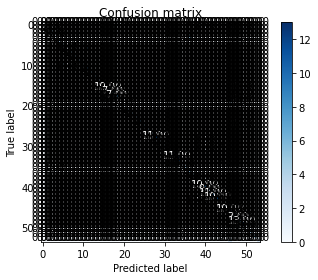

Logistic Regression Confusion Matrix



,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [14]:
### Checking Accuracy of the Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd


X_test=data["question"]
Y_test=data["answer"]

Y_pred1=[]
for i in X_test:
    
    P=model.transform([Cleaning(i)])
    predict1=clf1.predict(P)
    print (predict1)
    Y_pred1.append(predict1)

cnf_matrix = confusion_matrix(Y_test,Y_pred1)

print(Y_pred1)

import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
plot_confusion_matrix(cnf_matrix, classes=["+","-"],title='Confusion matrix')

print("Logistic Regression Confusion Matrix\n")
pd.DataFrame(confusion_matrix(Y_test,Y_pred1),columns=list(range(0,54)))

In [15]:
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

precision_score(Y_test,Y_pred1,average='weighted')
recall_score(Y_test,Y_pred1,average='weighted')
f1_score(Y_test,Y_pred1,average='weighted')
accuracy_score(Y_test,Y_pred1)
print(classification_report(Y_test,Y_pred1))

                    precision    recall  f1-score   support

                13       0.00      0.00      0.00         3
           13names       0.00      0.00      0.00         3
       AEseatavail       1.00      1.00      1.00         4
            ALevel       0.50      0.17      0.25         6
     ARCHseatavail       1.00      1.00      1.00         4
             AUnit       0.50      0.60      0.55         5
         AUnitCost       0.50      0.14      0.22         7
       AdminOffice       1.00      1.00      1.00         4
          BMEapply       1.00      1.00      1.00         4
      BMEseatavail       1.00      1.00      1.00         4
             BUnit       0.50      0.40      0.44         5
         BUnitCost       0.50      0.86      0.63         7
    BachDegreeYear       1.00      1.00      1.00         4
       CEseatavail       1.00      1.00      1.00         4
               CSE       1.00      1.00      1.00         3
      CSEseatavail       1.00      1.00

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: 

In [16]:
### Lets create KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

clf2 = KNeighborsClassifier(n_neighbors=3)
clf2.fit(X_train, Y)

P=model.transform([Cleaning(question)])
predict2=clf2.predict(P)
print (predict2)

['MISTestablished']


['greeting']
['greeting']
['ChairmanCouncil']
['greeting']
['greeting']
['greeting']
['greeting']
['greeting']
['greeting']
['greeting']
['greeting']
['greeting']
['greeting']
['goodbye']
['goodbye']
['greeting']
['Sports']
['goodbye']
['goodbye']
['goodbye']
['goodbye']
['Commandant']
['Commandant']
['Location']
['Cafeteria']
['Location']
['Location']
['CSE']
['Location']
['CSE']
['Clubs']
['13']
['13']
['13names']
['13names']
['13names']
['HeadCSE']
['HeadCSE']
['HeadCSE']
['nowlocation']
['Cafeteria']
['nowlocation']
['AdminOffice']
['AdminOffice']
['AdminOffice']
['AdminOffice']
['CyberRangeLoc']
['CyberRangeLoc']
['CyberRangeLoc']
['CyberRangeLoc']
['CSE']
['HeadCSE']
['CSE']
['BachDegreeYear']
['BachDegreeYear']
['BachDegreeYear']
['BachDegreeYear']
['PostGradCourse']
['PostGradCourse']
['13']
['PostGradCourse']
['PostGradCourse']
['PostGradCourse']
['PostGradCourse']
['13names']
['13names']
['13']
['applicantsBsc']
['applicantsBsc']
['applicantsBsc']
['applicantsBsc']
['applican

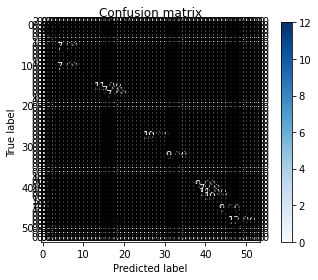

KNeighbours classifier Confusion Matrix



,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [17]:
### Checking Accuracy of the Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd


X_test=data["question"]
Y_test=data["answer"]

Y_pred2=[]
for i in X_test:
    
    P=model.transform([Cleaning(i)])
    predict2=clf2.predict(P)
    print (predict2)
    Y_pred2.append(predict2)

cnf_matrix = confusion_matrix(Y_test,Y_pred2)

print(Y_pred2)

import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
plot_confusion_matrix(cnf_matrix, classes=["+","-"],title='Confusion matrix')

print("KNeighbours classifier Confusion Matrix\n")
pd.DataFrame(confusion_matrix(Y_test,Y_pred2),columns=list(range(0,54)))

In [18]:
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

precision_score(Y_test,Y_pred2,average='weighted')
recall_score(Y_test,Y_pred2,average='weighted')
f1_score(Y_test,Y_pred2,average='weighted')
accuracy_score(Y_test,Y_pred2)
print(classification_report(Y_test,Y_pred2))

                    precision    recall  f1-score   support

                13       0.18      0.67      0.29         3
           13names       0.50      1.00      0.67         3
       AEseatavail       1.00      1.00      1.00         4
            ALevel       0.33      1.00      0.50         6
     ARCHseatavail       1.00      1.00      1.00         4
             AUnit       0.40      0.80      0.53         5
         AUnitCost       0.50      1.00      0.67         7
       AdminOffice       1.00      1.00      1.00         4
          BMEapply       1.00      1.00      1.00         4
      BMEseatavail       1.00      1.00      1.00         4
             BUnit       0.00      0.00      0.00         5
         BUnitCost       0.00      0.00      0.00         7
    BachDegreeYear       1.00      1.00      1.00         4
       CEseatavail       1.00      1.00      1.00         4
               CSE       0.50      0.67      0.57         3
      CSEseatavail       1.00      1.00

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: 

In [19]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier().fit(X_train, Y)

P=model.transform([Cleaning(question)])
predict3=clf3.predict(P)
print (predict3)

['Clubs']


In [ ]:
### Checking Accuracy of the Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd


X_test=data["question"]
Y_test=data["answer"]

Y_pred3=[]
for i in X_test:
    
    P=model.transform([Cleaning(i)])
    predict3=clf3.predict(P)
    print (predict3)
    Y_pred3.append(predict3)

cnf_matrix = confusion_matrix(Y_test,Y_pred3)

print(Y_pred3)

import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
plot_confusion_matrix(cnf_matrix, classes=["+","-"],title='Confusion matrix')

print("Decision Tree Confusion Matrix\n")
pd.DataFrame(confusion_matrix(Y_test,Y_pred3),columns=list(range(0,54)))

['greeting']
['greeting']
['greeting']
['greeting']
['greeting']
['greeting']
['greeting']
['greeting']
['greeting']
['greeting']
['greeting']
['greeting']
['greeting']
['goodbye']
['goodbye']
['goodbye']
['goodbye']
['goodbye']
['goodbye']
['goodbye']
['goodbye']
['Commandant']
['Commandant']
['Location']
['Location']
['Location']
['Location']
['MIST']
['Location']
['MIST']
['Clubs']
['13']
['13']
['13names']
['13names']
['13names']
['HeadCSE']
['HeadCSE']
['HeadCSE']
['nowlocation']
['nowlocation']
['nowlocation']
['AdminOffice']
['AdminOffice']
['AdminOffice']
['AdminOffice']
['CyberRangeLoc']
['CyberRangeLoc']
['CyberRangeLoc']
['CyberRangeLoc']
['CSE']
['CSE']
['CSE']
['BachDegreeYear']
['BachDegreeYear']
['BachDegreeYear']
['BachDegreeYear']
['PostGradCourse']
['PostGradCourse']
['13']
['PostGradCourse']
['PostGradCourse']
['PostGradCourse']
['UnderGradCourse']
['UnderGradCourse']
['UnderGradCourse']
['13']
['applicantsBsc']
['applicantsBsc']
['applicantsBsc']
['applicantsBsc']
[

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

precision_score(Y_test,Y_pred3,average='weighted')
recall_score(Y_test,Y_pred3,average='weighted')
f1_score(Y_test,Y_pred3,average='weighted')
accuracy_score(Y_test,Y_pred3)
print(classification_report(Y_test,Y_pred3))

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import model_selection



clf4 = MultinomialNB().fit(X_train, Y)

P=model.transform([Cleaning(question)])
predict4=clf4.predict(P)
print (predict4)



In [ ]:
### Checking Accuracy of the Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd


X_test=data["question"]
Y_test=data["answer"]

Y_pred4=[]
for i in X_test:
    
    P=model.transform([Cleaning(i)])
    predict4=clf4.predict(P)
    print (predict4)
    Y_pred4.append(predict4)

cnf_matrix = confusion_matrix(Y_test,Y_pred4)

print(Y_pred4)

import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
plot_confusion_matrix(cnf_matrix, classes=["+","-"],title='Confusion matrix')

print("Confusion Matrix\n")
pd.DataFrame(confusion_matrix(Y_test,Y_pred4),columns=list(range(0,54)))

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

precision_score(Y_test,Y_pred4,average='weighted')
recall_score(Y_test,Y_pred4,average='weighted')
f1_score(Y_test,Y_pred4,average='weighted')
accuracy_score(Y_test,Y_pred4)
print(classification_report(Y_test,Y_pred4))

In [ ]:
def Predict(text):
    P=model.transform([Cleaning(text)])
    predict1=clf1.predict(P)
    print (predict1)


    predict2=clf2.predict(P)
    print (predict2)
    
    predict3=clf3.predict(P)
    print (predict3)

    predict4=clf4.predict(P)
    print (predict4)
    
    final_predict=[]
    final_predict=list(predict1)+list(predict2)+list(predict3)+list(predict4)
    final_predict = Counter(final_predict)
    print (final_predict.most_common(1)[0][0])
    
    return final_predict.most_common(1)[0][0]

    

In [ ]:
answer_dictionary={"greeting":["Good Day!", "Hey!", "What a lovely day it is!", "Greetings!", "Hi! How are you?", "Hello to you too!", "Hi", "Welcome!", "Hello! How can I be of assistance?", "Hi! How can I be of help?", "Good day! How can I assist you now?", "Hello! How can I help you?", "Welcome! I'll be happy to help you!"],


"Commandant":["The current commandant of MIST is Maj Gen Md Wahid-Uz-Zaman, BSP, ndc, aowc, psc, te","Currently, Maj Gen Md Wahid-Uz-Zaman, BSP, ndc, aowc, psc, te is our Commandant.","Our Current Commandant is Maj Gen Md Wahid-Uz-Zaman, BSP, ndc, aowc, psc, te","Maj Gen Md Wahid-Uz-Zaman, BSP, ndc, aowc, psc, te is currently the commandant of MIST."],


"Location":["The location of MIST is in the Mirpur DOHS army cantonment.","Mist is located in the center of the Mirpur DOHS Army base.","It is located in Mirpur Cantonment"],


"MIST":["It may seem fog to you but its full form is Military Institute of Science & Technology","MIST stands for Military Institute of Science & Technology","This MIST doesn't mean fog, rather it means Military Institute of Science & Technology"],


"13":["There are currently 13 departments here in MIST","MIST has 13 departments in total","It consists of 13 departments.","MIST has a total number of 13 departments within it currently operational."],


"13names":["The departments are as follows: CSE, EECE, ME, IPE, Architecture, CE, BME, AE, PME, EWCE, FH, NAME and NSE"],


"HeadCSE":["The current Head of the department of CSE is Brig Gen Md Abdur Razzak, SUP, psc","Currently, Brig Gen Md Abdur Razzak, SUP, psc is the head of the department of CSE.","The Current head of the department of CSE is Brig Gen Md Abdur Razzak, SUP, psc","Brig Gen Md Abdur Razzak, SUP, psc is currently the head of the department of CSE."],


"CyberRangeLoc":["CyberRange is at tower 3, 3rd floor.","It is located on the 3rd floor of the ECE building, tower 3"],


"CSE":["The full form of CSE is Computer Science & Engineering.","CSE stands for Computer Science & Engineering","It means Computer Science & Engineering","Its full form is Computer Science & Engineering"],


"BachDegreeYear":["The BSC requires 4 years to complete.","You can complete BSC in 4 years,  but it might take up to 6 years depending on the result.","The BSC will take 4-6 years depending how on your performance or your certain decisions."],


"HSC":["In addition to an A+ in physics, chemistry, math, and English, you need a GPA of 5 in both the HSC and SSC.","A+ in physics, chemistry, math, and English are required in addition to a GPA of 5 in both the HSC and SSC.","Along with an A+ in physics, chemistry, math, and English, you also need a GPA of 5 in both the HSC and SSC.","Both HSC and SSC require a GPA of 5 and an A+ in Physics, Chemistry, Mathematics, and English."],


"BMEapply":["Apparently, BME requires A+ in biology in both SSC & HSC","Apparently, BME requires both SSC and HSC biology A+ grades.","It seems that BME requires an A+ in biology for both SSC and HSC.","Biology A+ in both the SSC and HSC is reportedly a requirement for BME.","It appears that BME requires an A+ in biology for both SSC and HSC."],


"Units":["There are 2 units in MIST admission exam: Engineering & Architecture.","The MIST admission test consists of two units: engineering and architecture.","Engineering and Architecture are the two sections of the MIST entrance test.","Engineering and Architecture are the two subjects covered in the MIST admission test."],


"goodbye":["Goodbye","Have a good day","Was nice meeting you","See you later", "have a nice day", "see you later", "good night", "bye bye", "talk to you later", "see you too", "have a nice day", "talk to you soon", "you have a lovely day sir!"],


"nowlocation":["You are in the CSE Department right now. The department is on the 3rd floor of tower 3","You are in tower 3 3rd floor in the CSE department","Right now, you are in the CSE Department. The department is located on the third floor of tower 3.","You are now in the CSE Department. The department is situated on tower 3's third floor."],


"AdminOffice":["Take the lift and go to the ground floor. Walk towards the plaza and the admin office will be situated right across the road on your left","The admin office is the white building situated on the opposite side of the road of the towers. Walk to the lift and go to the ground floor. As you walk toward the plaza, the administrative office is direct across the street on your left." ],


"PostGradCourse":["MIST offers M.Sc./M.Engg./Ph.D. in CSE, CE, EECE, ME, AE, NSE and in NAME departments, M.Sc./M.Engg. in BME and M.Phil. in Mathematics, Physics & Chemistry."," MIST provides Ph.D., M.Sc./M.Engg., and M.Phil. degrees in the departments of CSE, CE, EECE, ME, AE, NSE, and NAME as well as M.Sc./M.Engg. in BME and M.Phil. in Math, Physics, and Chemistry.","MIST provides M.Sc./M.Engg./Ph.D. in the departments of CSE, CE, EECE, ME, AE, NSE, and NAME as well as M.Sc./M.Engg. in BME and M.Phil. in Mathematics, Physics, and Chemistry."],


"UnderGradCourse":["MIST offers BSc for a total of 12 departments namely CSE, EECE, CE, ME, AE, NSE, NAME, IPE, EWCE, PME, BME, and Architecture."," The 12 departments that makeup MIST's BSc program are CSE, EECE, CE, ME, AE, NSE, NAME, IPE, EWCE, PME, BME, and Architecture.","A total of 12 departments, including CSE, EECE, CE, ME, AE, NSE, NAME, IPE, EWCE, PME, BME, and Architecture, provide BSc degrees through MIST."],


"applicantsBsc":["2 types of applicants can apply in MIST they are students that have passed the Higher Secondary School Certificate Examination in Science Group in the current year and any students of International Applicant residing outside the country"," Students who passed the current year's Higher Secondary School Certificate Examination in the Science Group or any students of International Applicants who are abroad are the 2 types of applicants eligible for MIST's undergraduate course"," MIST offers BSc degree to 2 types of applicants- 1. Students who passed the Higher Secondary School Certificate Examination in the Science Group last year 2. any foreign applicants who live abroad"],


"seatsavailBsc":["A total of 570 seats are available for Bachelor's degrees in MIST taking all departments' seat availability into account."," When all departments' available seats are taken into consideration, there are 570 seats available for Bachelor's degrees in MIST.","Taking into account the seat availability across all departments, there are 570 seats available for Bachelor's degrees in MIST."],


"qualificationLocal":["For Bangladeshi students, the applicant must obtain a minimum total grade point of 17 in four subjects (Mathematics, Physics, Chemistry, and English) in HSC and a minimum GPA of 4.00 without the fourth subject in the Science group for SSC. For International Curriculum students,  the applicant must have a minimum of two 'B' grades and one 'C' grade in Mathematics, Physics, and Chemistry at GCE 'A' Level and a minimum 'B' grade in five subjects including Mathematics, Physics, Chemistry, and English in GCE 'O' Level.","Students from Bangladesh must have a minimum cumulative grade point average of 17 in four subjects (Mathematics, Physics, Chemistry, and English) in the HSC and a minimum GPA of 4.00 in the Science group in the SSC exam. For students enrolled in the International Curriculum, the candidate must have earned at least two B grades in each of mathematics, physics, and chemistry at the GCE A Level and at least one C grade in each of those subjects at the GCE O Level."],


"qualificationInter":["For International students, the applicant must have Educational qualifications as applicable for Bangladeshi students or equivalent and a security clearance from the respective Embassy/ High Commission in Bangladesh.","For international students, the applicant must possess academic credentials that are similar to or the same as those required of Bangladeshi students, as well as a security clearance from the relevant embassy or high commission in Bangladesh."],


"SSC":["The applicant must have passed the examination in Science Group obtaining a minimum GPA of 4.00 (without fourth subject) on a scale of 5.0. Only the applicants who passed SSC or Equivalent Examination.","The candidate must have obtained a minimum GPA of 4.00 (without a fourth subject) on a scale of 5.0 after passing the Science Group examination. Only those candidates who passed the SSC or a comparable exam.","A minimum GPA of 4.00 (without a fourth subject) on a scale of 5.0 is required for the applicant to have passed the Science Group examination in SSC or a similar exam."],


"ALevel":["The applicant who passed in the current and previous year must have minimum two 'B' grades and one 'C' grade in Mathematics, Physics, and Chemistry in GCE 'A' Level. Applicants interested in Biomedical Engineering must have Biology at HSC or equivalent level with a minimum grade point of 'A-' / GCE 'A' or equivalent level with a minimum grade point of 'C'.","The applicant must have at least two B grades and one C grade in Mathematics, Physics, and Chemistry at GCE A Level in the current and previous academic year. Biology at the HSC or comparable level with a minimum grade point of A- or GCE A or equivalent level with a minimum grade point of C is required of applicants interested in biomedical engineering."],
"OLevel":["The applicant must have earned a minimum B grade in five subjects—including mathematics, physics, chemistry, and English—at the GCE O Level in both the current and preceding academic year.","The applicant who passed in the corresponding current and previous year must have qualified with a minimum 'B' grade in five subjects including Mathematics, Physics, Chemistry, and English in GCE 'O' Level."],


"AUnit":["There are a total of 11 departments in A unit namely CSE, EECE, CE, NAME, NSE, BME, IPE, PME, EWCE, AE and ME department."," The CSE, EECE, CE, NAME, NSE, BME, IPE, PME, EWCE, AE, and ME departments make up the total of 11 departments in A unit.","The 11 departments that make up A unit are CSE, EECE, CE, NAME, NSE, BME, IPE, PME, EWCE, AE, and ME"],


"BUnit":["The Architecture Department is the sole department that makes up the B unit"," There is only 1 department in the B unit, and that department is the Architecture Department.","The B unit consists of only 1 department which is the Architecture Department."],


"CSEseatavail":["A total of 60 seats are available for the CSE department for the Bachelor's degree."," For the Bachelor's degree, the CSE department has a total of 60 seats available.","The CSE department has a total of 60 seats available for the Bachelor's program."],


"EECEseatavail":["A total of 60 seats are available for the EECE department for the Bachelor's degree."," For the Bachelor's degree, the EECE department has a total of 60 seats available.","The EECE department has a total of 60 seats available for the Bachelor's program."],


"CEseatavail":["A total of 60 seats are available for the CE department for the Bachelor's degree."," For the Bachelor's degree, the CE department has a total of 60 seats available.","The CE department has a total of 60 seats available for the Bachelor's program."],


"MEseatavail":["A total of 60 seats are available for the ME department for the Bachelor's degree."," For the Bachelor's degree, the ME department has a total of 60 seats available.","The ME department has a total of 60 seats available for the Bachelor's program."],


"EWCEseatavail":["A total of 60 seats are available for the EWCE department for the Bachelor's degree."," For the Bachelor's degree, the EEWE department has a total of 60 seats available.","The EWCE department has a total of 60 seats available for the Bachelor's program."],


"AEseatavail":["A total of 50 seats are available for the AE department for the Bachelor's degree."," For the Bachelor's degree, the AE department has a total of 50 seats available.","The AE department has a total of 50 seats available for the Bachelor's program."],


"NAMEseatavail":["A total of 40 seats are available for the NAME department for the Bachelor's degree."," For the Bachelor's degree, the NAME department has a total of 40 seats available.","The NAME department has a total of 40 seats available for the Bachelor's program."],


"IPEseatavail":["A total of 50 seats are available for the IPE department for the Bachelor's degree."," For the Bachelor's degree, the IPE department has a total of 50 seats available.","The IPE department has a total of 50 seats available for the Bachelor's program."],
"BMEseatavail":["A total of 40 seats are available for the BME department for the Bachelor's degree."," For the Bachelor's degree, the BME department has a total of 40 seats available.","The BME department has a total of 40 seats available for the Bachelor's program."],


"NSEseatavail":["A total of 40 seats are available for the NSE department for the Bachelor's degree."," For the Bachelor's degree, the NSE department has a total of 40 seats available.","The NSE department has a total of 40 seats available for the Bachelor's program."],


"PMEseatavail":["A total of 25 seats are available for the PME department for the Bachelor's degree."," For the Bachelor's degree, the NAME department has a total of 25 seats available.","The PME department has a total of 25 seats available for the Bachelor's program."],


"ARCHseatavail":["A total of 25 seats are available for the Architecture department for the Bachelor's degree."," For the Bachelor's degree, the Architecture department has a total of 25 seats available.","The Architecture department has a total of 25 seats available for the Bachelor's program."],


"applyApplication":["The applicants can apply through the online system for the Admission test in MIST.  No manual application will be accepted unless there is some system difficulty in the application process."," The applicants can use the online portal to register for the MIST Admission test. No manual application will be accepted unless there is an application process system issue.","The MIST Admission test is open to applicants who wish to apply online. Unless there is a system issue with the application process, no manual applications will be accepted."],


"AUnitCost":["An applicant needs to deposit Tk. 800 (Eight Hundred) for unit A"," For unit A, an applicant must put down Tk. 800 (Eight Hundred).","For unit A, a deposit of Tk. 800 (Eight Hundred) is required."],


"BUnitCost":["An applicant needs to deposit Tk 1000 (One Thousand) for unit B"," For unit B, an applicant must put down Tk 1000 (One Thousand).","For unit B, a deposit of Tk 1000 (One Thousand) is required."],


"MISTestablished":["MIST was established on 19 April 1998 by Honorable Prime Minister Sheikh Hasina."," On April 19, 1998, Honorable Prime Minister Sheikh Hasina established MIST."," Honorable Prime Minister Sheikh Hasina founded MIST on April 19, 1998.","Honorable Prime Minister Sheikh Hasina founded MIST on April 19th, 1998."],


"Clubs":["There are a total of 13 clubs in MIST namely the Aeronautics club, Career club, Computer club, Debating club, Drama club, Einthoven club, Environment club, Photography club, Literature and Cultural club, Mathematics club, Innovation club, MOTO MIST club, and Robotics club.","The Aeronautics club, the Career Club, the Computer Club, the Debating club, the Drama club, the Einthoven club, the Environment club, the Photography club, the Literature and Cultural Club, the Mathematics club, the Innovation club, the MOTO MIST club, and the Robotics club are among the 13 clubs that make up MIST."],


"Hall":["MIST is a residential institute with only one Student Hall named Osmany Hall. It is an 8 storied building with female and male wings, each wing having a capacity of 262 students."," The lone student hall in the residential institute MIST is called Osmany Hall. It is an eight-story structure with separate wings for male and female students, each of which can accommodate 262 students."],


"Sports":["The Directorate of Students' Welfare (DSW) facilitates various games and sports competitions for the students of MIST.  These Intra MIST events include Inter-Department Athletics Competition,  Inter Department Cricket Competition,  Inter-Department Football Competition,  Inter-Department Volleyball Competition, and Inter-Department Basketball Competition."," For the benefit of MIST students, the Directorate of Students' Welfare (DSW) organizes a variety of sporting events like inter-departmental athletics, inter-departmental cricket, inter-departmental football, inter-departmental volleyball, and inter-departmental basketball."," MIST organizes a variety of sporting events for the students. The inter-departmental athletics competition, inter-departmental cricket competition, inter-departmental football competition, inter-departmental volleyball competition, and inter-departmental basketball competition are among several intra-MIST events."],


"Medical":["MIST has a Medical Center where students, faculties, and all staff of MIST can go for any health-related issues.  The Medical Center is situated on the 2nd Floor of the Admin Building."," Students, faculty, and any other MIST employees can go to the medical center at MIST for any health-related difficulties. The second floor of the administrative building is where the medical center is located."," There is a medical center at MIST where all MIST staff, faculty, and students can go for medical problems. The second floor of the administrative building houses the medical center."],


"Library":["MIST has a Central Library situated on the 3rd Floor of the Admin Building."," On the third floor of the administrative building, MIST contains a Central Library."," On the third floor of the administrative building is where MIST's Central Library is located."," The third floor of the administrative building houses the Central Library of MIST."],


"Cafeteria":["MIST offers Cafeteria facilities for the students. The New Café MIST is situated on the 1st floor of Tower 4"," MIST provides its students with cafeteria services. The New Café MIST is located on Tower 4's first floor."," MIST provides cafeteria services to its students. On the first floor of Tower 4, you'll find The New Café MIST."," For the benefit of its students, MIST provides a cafeteria. In Tower 4, on the first floor, is The New Café MIST."],


"Stationery":["There are two stationery shops in MIST. One is located beside the admin building and another inside the cafeteria."," In MIST, there are two stationary stores. One is within the cafeteria, while the other is next to the administrative building."," Two stationary stores may be found in MIST. One is next to the administrative building, and the other is inside the cafeteria."," MIST has two places to buy stationery. Both are in the cafeteria and one is next to the administrative building."],


"Scholarship":["MIST offers 5 types of scholarships to its students namely MIST Scholarship,  Osmany Memorial Trust Scholarship, Chief of Army Staff Scholarship, Chief of Naval Staff Scholarship and Chief Of Air Staff Scholarship."," MIST provides its students with five different types of scholarships: the MIST Scholarship, the Osmany Memorial Trust Scholarship, the Chief of Army Staff Scholarship, the Chief of Naval Staff Scholarship, and the Chief of Air Staff Scholarship."," A total of five different scholarship options are available to MIST students: the MIST Scholarship, the Osmany Memorial Trust Scholarship, the Chief of Army Staff Scholarship, the Chief of Naval Staff Scholarship, and the Chief of Air Staff Scholarship."],


"Stipend":["MIST offers 3 types of stipends or financial aid to its students namely the MIST Stipend, the Buro Bangladesh Stipend, and the Chief of Army Staff Stipend.","The MIST Stipend, the Buro Bangladesh Stipend, and the Chief of Army Staff Stipend are the three different types of financial aid that MIST provides to its students.","MIST provides its students with three different forms of stipends or financial aid: the MIST Stipend, the Buro Bangladesh Stipend, and the Chief of Army Staff Stipend."],


"ChairmanCouncil":["Hon'ble Minister of Ministry of Education is the chairman of the council of MIST.","The chairman of the MIST council is the honorable minister of education.","The MIST council is presided over by the honorable minister of education."],


"ChairmanGoverning":["Commandant, MIST, and Engineer in Chief, AHQ - Chairman (whoever is the senior) is the chairman of the governing body of MIST","The head of MIST's governing body is the Commandant, MIST, and Engineer in Chief, AHQ - Chairman (whoever is the senior).","The head of MIST's governing body is either the commandant or the engineer in chief of AHQ, whichever is the more senior."]


}

In [ ]:
import random

def generate_answer(predict_class):
    ans=random.choice(answer_dictionary[predict_class])
    return ans

In [ ]:
###### The ChatBot #######
question = input("Enter Question =")
prediction=Predict(question)
ans=generate_answer(prediction)
print("Answer = ",ans)